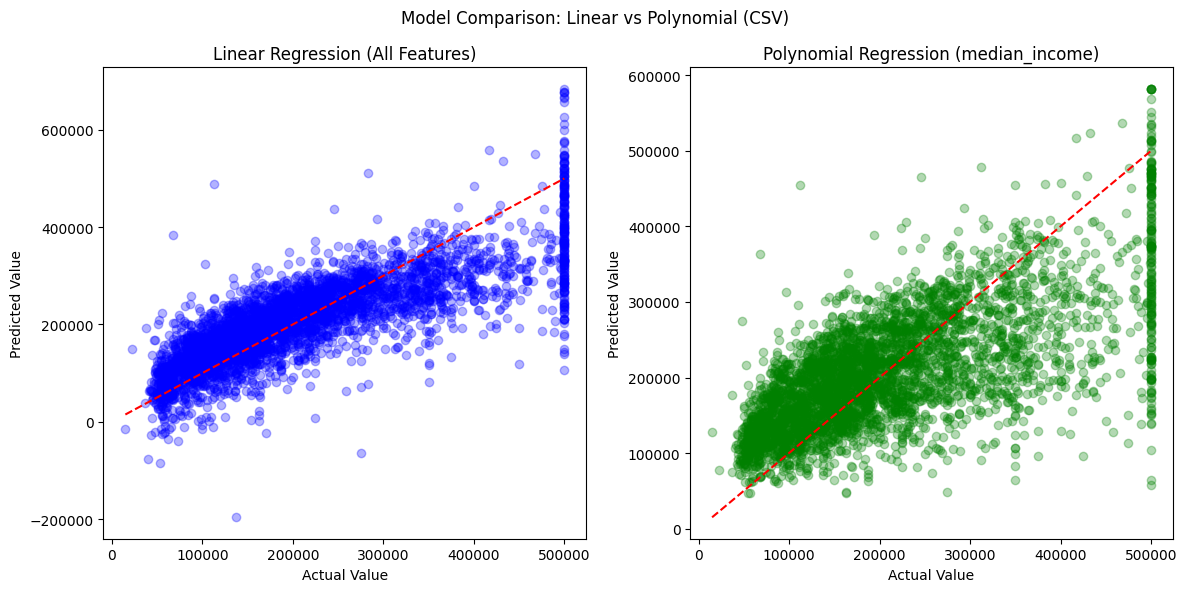


Comparison Summary:
Linear Regression -> MSE: 4921881237.63, R²: 0.6401
Polynomial Regression -> MSE: 7166094383.14, R²: 0.4760


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load and clean data
df = pd.read_csv("housing.csv")
df.dropna(inplace=True)

# Remove non-numeric feature
df = df.drop("ocean_proximity", axis=1)

# Target
y = df["median_house_value"]

# ---------- Linear Regression with all numeric features ----------
X_lr = df.drop("median_house_value", axis=1)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)
y_pred_lr = model_lr.predict(X_test_lr)

mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)

# ---------- Polynomial Regression using median_income ----------
X_poly = df[["median_income"]]
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_poly.fit(X_train_p, y_train_p)
y_pred_poly = model_poly.predict(X_test_p)

mse_poly = mean_squared_error(y_test_p, y_pred_poly)
r2_poly = r2_score(y_test_p, y_pred_poly)

# ---------- Plot comparison ----------
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_lr, y_pred_lr, alpha=0.3, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Linear Regression (All Features)")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

plt.subplot(1, 2, 2)
plt.scatter(y_test_p, y_pred_poly, alpha=0.3, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Polynomial Regression (median_income)")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

plt.suptitle("Model Comparison: Linear vs Polynomial (CSV)")
plt.tight_layout()
plt.show()

# ---------- Summary ----------
print("\nComparison Summary:")
print(f"Linear Regression -> MSE: {mse_lr:.2f}, R²: {r2_lr:.4f}")
print(f"Polynomial Regression -> MSE: {mse_poly:.2f}, R²: {r2_poly:.4f}")
